In [15]:
!pip install simpy
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def warehouse_run(env, order_cutoff, order_target):
  global inventory, balance, num_ordered  # Se declaran variables globales

  inventory = order_target  # Se inicializa el inventario con el valor objetivo
  balance = 0.0  # Se inicializa el balance en 0
  num_ordered = 0  # Se inicializa el número de órdenes en 0

  while True:  # Bucle infinito
    interarrival = generate_interarrival()  # Genera un tiempo de interllegada
    yield env.timeout(interarrival)  # Espera el tiempo de interllegada
    balance -= inventory*2*interarrival  # Actualiza el balance restando el costo de inventario
    demand = generate_demand()  # Genera la demanda
    if demand < inventory:  # Si la demanda es menor que el inventario
      balance += 100*demand  # Aumenta el balance por las ventas
      inventory -= demand  # Actualiza el inventario restando la demanda
      print('{:.2f} sold {}'.format(env.now, demand))  # Imprime la venta realizada
    else:  # Si la demanda es mayor o igual que el inventario
      balance += 100*inventory  # Aumenta el balance por las ventas del inventario actual
      inventory = 0  # El inventario se queda sin stock
      print('{:.2f} sold {} (out of stock)'.format(env.now, inventory))  # Imprime que no hay stock
    if inventory < order_cutoff and num_ordered == 0:  # Si el inventario es menor que el punto de reorden y no hay órdenes pendientes
      env.process(handle_order(env, order_target))  # Inicia el proceso para manejar una nueva orden

In [17]:
def handle_order(env, order_target):
  global inventory, balance, num_ordered  # Se declaran variables globales

  num_ordered = order_target - inventory  # Calcula la cantidad de productos a ordenar
  print('{:.2f} placed order for {}'.format(env.now, num_ordered))  # Imprime la orden realizada
  balance -= 50*num_ordered  # Resta el costo de ordenar a la balance
  yield env.timeout(2.0)  # Espera un tiempo de procesamiento de la orden
  inventory += num_ordered  # Añade los productos ordenados al inventario
  num_ordered = 0  # Reinicia el número de órdenes a 0
  print('{:.2f} received order, {} in inventory'.format(env.now, inventory))  # Imprime la recepción de la orden

In [18]:
def generate_interarrival():
  return np.random.exponential(1./5)  # Genera un tiempo de interllegada exponencial

In [19]:
def generate_demand():
  return np.random.randint(1, 5)  # Genera una demanda aleatoria entre 1 y 4

obs_time = []  # Lista para almacenar los tiempos de observación
inventory_level = []  # Lista para almacenar el nivel de inventario

In [22]:
def observe(env):
  global inventory  # Se declara una variable global

  while True:  # Bucle infinito
    obs_time.append(env.now)  # Agrega el tiempo actual a la lista de tiempos de observación
    inventory_level.append(inventory)  # Agrega el nivel de inventario actual a la lista
    yield env.timeout(0.1)

0.16 sold 2
0.53 sold 4
0.69 sold 2
0.88 sold 3
1.00 sold 3
1.01 sold 1
1.11 sold 3
1.44 sold 3
1.61 sold 2
1.97 sold 1
1.99 sold 4
1.99 placed order for 28
2.08 sold 2
2.38 sold 4
2.79 sold 4
3.11 sold 4
3.26 sold 4
3.28 sold 1
3.46 sold 2
3.99 received order, 29 in inventory
4.04 sold 4
4.06 sold 4
4.06 placed order for 29
4.12 sold 4
4.39 sold 1
4.56 sold 1
4.63 sold 2
4.82 sold 1
4.92 sold 1


Text(0, 0.5, 'Inventory level')

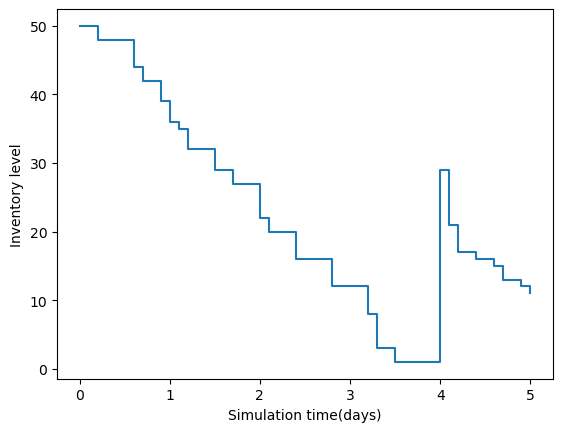

In [23]:
np.random.seed(0)

env = simpy.Environment()
env.process(warehouse_run(env, 25, 50))
env.process(observe(env))

env.run(until = 5.0)

plt.figure()
plt.step(obs_time, inventory_level, where = 'post')
plt.xlabel('Simulation time(days)')
plt.ylabel('Inventory level')